[10637 38907 57765 15518 30826 34432 53571  6886 49120 17875 26904 18373
 20036 35095  6070 17750 14619  8829 56335 20137 42077 57469 59670 34618
 17095  4075 17867 35356 26050 50980]
[2 2 2 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 2 1 0 2 0 0 2 1 0 0 0 1]
[15518 34432 53571  6886 49120 18373 35095  6070 17750 14619  8829 42077
 59670 34618 17867 35356 26050]


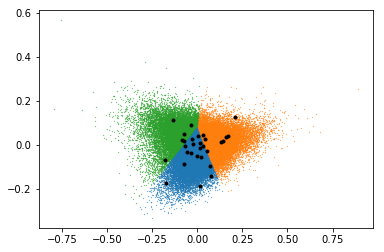

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def corpusNumLines():
    num_lines_in_corpus = !wc -l $corpus_train_file | sed "s/$corpus_train_file//g;"
    num_lines_in_corpus = int(num_lines_in_corpus.s)
    return num_lines_in_corpus

#  parameters
docvec_file = "docvec60000"
corpus_train_file = "split60000aa"
data = np.load(docvec_file)
corpus = open(corpus_train_file,"r")
num_cluster = 3
num_lines_in_corpus = corpusNumLines()

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters= num_cluster, n_init=20)
fit_reduced_data = kmeans.fit(reduced_data)

#print("----- Labels -----")
#print(fit_reduced_data.labels_)

news_index_randpick = np.random.randint(0,num_lines_in_corpus-1,30)
news_randpick_label= fit_reduced_data.labels_[news_index_randpick]


for num in range(num_cluster):
    news_cluster = news_index_randpick[news_label==num]
    news_cluster

for num in range(num_cluster):
    condition = fit_reduced_data.labels_ == num
    filtered_reduced_data_x = reduced_data[condition,0]
    filtered_reduced_data_y = reduced_data[condition,1]
    plt.plot(filtered_reduced_data_x, filtered_reduced_data_y, '.', markersize=0.5)

plt.plot(reduced_data[news_index_randpick, 0], reduced_data[news_index_randpick, 1], 'k.')
plt.show()
